In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

DATA_DIR = r"F:\Projects\ML_Models\BrainTome\BraTS2025_Data\BraTS2025-GLI-PRE-Challenge-TrainingData"


In [2]:
def load_patient_modalities(patient_id):
    folder_path = os.path.join(DATA_DIR, patient_id)
    suffix_map = {
        "t1": f"{patient_id}-t1n.nii.gz",
        "t1ce": f"{patient_id}-t1c.nii.gz",
        "t2": f"{patient_id}-t2w.nii.gz",
        "flair": f"{patient_id}-t2f.nii.gz",
        "seg": f"{patient_id}-seg.nii.gz"
    }

    scans = {}
    for mod, filename in suffix_map.items():
        file_path = os.path.join(folder_path, filename)
        if os.path.exists(file_path):
            scans[mod] = nib.load(file_path).get_fdata()
        else:
            print(f"[MISSING] {file_path}")
            scans[mod] = None
    return scans


In [3]:
def visualize_modalities(scans, slice_index=100):
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    for i, mod in enumerate(["t1", "t1ce", "t2", "flair"]):
        if scans[mod] is not None:
            axs[i].imshow(scans[mod][:, :, slice_index], cmap="gray")
            axs[i].set_title(mod.upper())
            axs[i].axis("off")
        else:
            axs[i].set_title(f"{mod.upper()} (missing)")
            axs[i].axis("off")
    plt.tight_layout()
    plt.show()


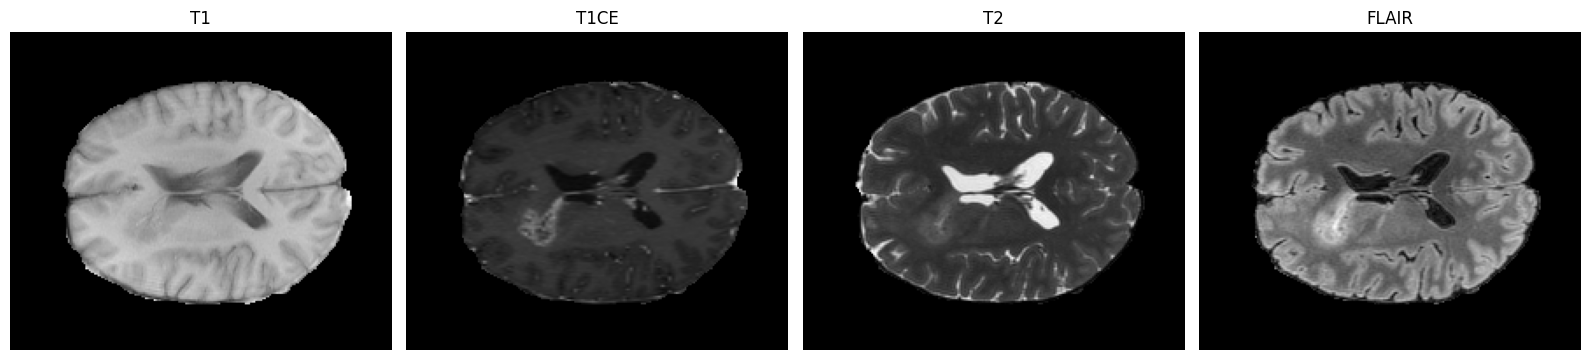

In [4]:
scans = load_patient_modalities("BraTS-GLI-00000-000")
visualize_modalities(scans)
